<a href="https://colab.research.google.com/github/zahranicp/hands-on-ML2/blob/main/chapter02/secondhand/2nd_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/zahranicp/hands-on-ML2/main/chapter02/dataset02/secondhanddataset.csv')

# Cek informasi umum tentang dataset
print("Informasi dataset:")
print(data.info())

# Cek statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

# Cek missing values
print("\nCek Missing Values:")
print(data.isnull().sum())

# Cek korelasi antara kolom yang berhubungan
print("\nKorelasi antar kolom:")
print(data.corr())

# Cek apakah ada kolom yang redundant (misalnya: 'on road old' dan 'on road now')
print("\nCek duplikasi kolom:")
print(data[['on road old', 'on road now']].head())

# Hapus kolom ID jika tidak diperlukan
data_cleaned = data.drop(columns=['v.id'])

# Gabungkan kolom 'on road old' dan 'on road now' jika perlu, misalnya dengan menghitung rata-rata
data_cleaned['mileage'] = data_cleaned[['on road old', 'on road now']].mean(axis=1)
data_cleaned = data_cleaned.drop(columns=['on road old', 'on road now'])

# Periksa data yang sudah dibersihkan
print("\nData setelah pembersihan:")
print(data_cleaned.head())

# Cek kembali apakah ada data yang hilang setelah pembersihan
print("\nCek missing values setelah pembersihan:")
print(data_cleaned.isnull().sum())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB
None

Statistik Deskriptif:
              v.id    on road old  on road now        years             km  \
count  1000.000000    1000.000000    1000.0000  1000.000000    1000.000000   
mean    500.500000  601

Berdasarkan hasil pemeriksaan dan proses pembersihan data, diperoleh beberapa kesimpulan sebagai berikut:

- Seluruh nilai pada dataset telah dinyatakan lengkap tanpa adanya missing values, sehingga data siap digunakan untuk proses pemodelan.

- Kolom v.id dihapus karena hanya berfungsi sebagai identitas unik dan tidak memiliki relevansi terhadap proses prediksi.

- Kolom on road old dan on road now digabung menjadi satu fitur baru bernama mileage, yang merepresentasikan nilai rata-rata dari kedua kolom tersebut. Kolom asal yang bersifat redundan kemudian dihapus.

- Dataset akhir telah berada dalam format yang terstruktur dan sesuai untuk digunakan dalam pembangunan model *Machine Learning* berbasis *Multilayer Perceptron* (MLP) serta perhitungan metrik evaluasi seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan *R-Squared*.

**PyTorch**

Epoch [10/100], Loss: 0.0061
Epoch [20/100], Loss: 0.0028
Epoch [30/100], Loss: 0.0019
Epoch [40/100], Loss: 0.0014
Epoch [50/100], Loss: 0.0010
Epoch [60/100], Loss: 0.0006
Epoch [70/100], Loss: 0.0006
Epoch [80/100], Loss: 0.0004
Epoch [90/100], Loss: 0.0003
Epoch [100/100], Loss: 0.0003


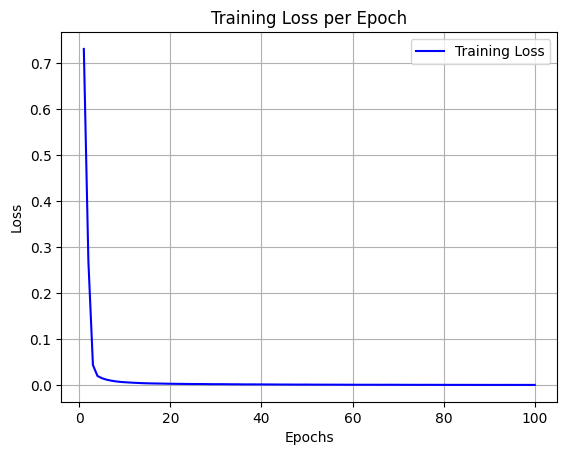

Mean Squared Error (MSE): 0.0031
Root Mean Squared Error (RMSE): 0.0558
R-Squared: 0.9971


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/zahranicp/hands-on-ML2/main/chapter02/secondhand/dataset/secondhanddataset.csv')

X = data.drop(columns=['current price']).values
y = data['current price'].values.reshape(-1, 1)  # Bentuk y harus (n_samples, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalisasi target
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Mengubah data menjadi tensor PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# DataLoader untuk batch processing
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Membangun model MLP
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Lapisan pertama dengan 128 neuron
        self.fc2 = nn.Linear(128, 64)  # Lapisan kedua dengan 64 neuron
        self.fc3 = nn.Linear(64, 1)  # Lapisan output (tanpa aktivasi karena regresi)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Aktivasi ReLU untuk lapisan pertama
        x = torch.relu(self.fc2(x))  # Aktivasi ReLU untuk lapisan kedua
        x = self.fc3(x)  # Output tanpa aktivasi
        return x

# Inisialisasi model
model = MLP(input_dim=X_train.shape[1])

# Loss function dan optimizer
criterion = nn.MSELoss()  # Mean Squared Error (MSE) untuk regresi
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Optimizer Adam dengan learning rate kecil

# Training model
epochs = 100
train_losses = []
for epoch in range(epochs):
    model.train()  # Mengaktifkan mode pelatihan
    epoch_loss = 0  # Menyimpan akumulasi loss per epoch

    for batch_X, batch_y in train_loader:  # Iterasi melalui batch dalam DataLoader
        optimizer.zero_grad()  # Reset gradien sebelum backpropagation
        outputs = model(batch_X)  # Prediksi dari model
        loss = criterion(outputs, batch_y)  # Hitung loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update bobot model
        epoch_loss += loss.item()  # Simpan total loss

    # Simpan nilai loss untuk plotting
    train_losses.append(epoch_loss / len(train_loader))

    # Tampilkan loss setiap 10 epoch
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}')

# Plot Training Loss
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', color='b')
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi menggunakan MSE, RMSE, dan R-Squared
model.eval()  # Mengaktifkan mode evaluasi

# Prediksi pada data uji
with torch.no_grad():
    y_pred = model(X_test)

# Menghitung MSE, RMSE, dan R-Squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-Squared: {r2:.4f}')


**Evaluasi TensorFlow**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.6536 - val_loss: 0.0760
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0555 - val_loss: 0.0282
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0212 - val_loss: 0.0160
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0088 - val_loss: 0.0110
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0071 - val_loss: 0.0093
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058 - val_loss: 0.0093
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - val_loss: 0.0090
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss: 0.0085
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 0.0079
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0076
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


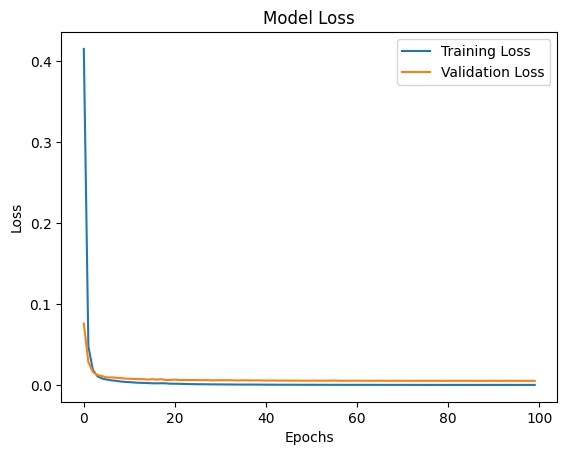

Mean Squared Error (MSE): 0.0051
Root Mean Squared Error (RMSE): 0.0711
R-Squared: 0.9953


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/zahranicp/hands-on-ML2/main/chapter02/secondhand/dataset/secondhanddataset.csv')

# Fitur dan target
X = data.drop(columns=['current price']).values
y = data['current price'].values.reshape(-1, 1)  # Bentuk y harus (n_samples, 1)

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Membangun model MLP
model = models.Sequential()

# Lapisan pertama dengan 128 neuron
model.add(layers.Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Lapisan kedua dengan 64 neuron
model.add(layers.Dense(64, activation='relu'))

# Lapisan output dengan 1 neuron (regresi)
model.add(layers.Dense(1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluasi model
y_test_pred = model.predict(X_test)

# Menghitung MSE, RMSE, dan R-Squared
mse = np.mean((y_test_pred - y_test) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))


# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-Squared: {r2:.4f}')


### **Persamaan Matematika dalam Pelatihan Model MLP (Multilayer Perceptron)**

Dalam proses pelatihan model **Multilayer Perceptron (MLP)** menggunakan framework **PyTorch** maupun **TensorFlow**, terdapat sejumlah persamaan matematis fundamental yang menggambarkan alur kerja jaringan saraf, mulai dari *forward pass*, *backpropagation*, hingga proses optimisasi dan evaluasi model.


### **1. Forward Pass**

Tahap **forward pass** merupakan proses propagasi data input melalui setiap lapisan jaringan untuk menghasilkan output prediksi.  
Setiap lapisan penuh (*fully connected layer*) dalam MLP direpresentasikan oleh persamaan linear berikut:

$ \mathbf{y} = \sigma(\mathbf{W}\mathbf{x} + \mathbf{b}) $

Keterangan:  
- $ \mathbf{W} $ : matriks bobot yang menghubungkan neuron antar lapisan  
- $ \mathbf{x} $ : vektor input pada lapisan tertentu  
- $ \mathbf{b} $ : vektor bias  
- $ \sigma $ : fungsi aktivasi non-linear  
- $ \mathbf{y} $ : output lapisan tersebut  

Dalam implementasi model ini, fungsi aktivasi yang digunakan adalah **Rectified Linear Unit (ReLU)**:

$ \text{ReLU}(x) = \max(0, x) $

ReLU memperkenalkan non-linearitas ke dalam jaringan dengan meniadakan nilai negatif, sekaligus menjaga stabilitas gradien saat pelatihan.


### **2. Backpropagation dan Optimisasi**

Setelah forward pass, model menghitung *loss* atau tingkat kesalahan antara nilai prediksi ($ \hat{y} $) dan nilai aktual ($ y $) menggunakan **Mean Squared Error (MSE)**:

$ \text{Loss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

Tahap berikutnya adalah **backpropagation**, yaitu proses menghitung gradien dari *loss function* terhadap parameter model ($ \mathbf{W}, \mathbf{b} $) dan memperbaruinya agar kesalahan dapat diminimalkan.  
Pembaruan bobot dilakukan menggunakan algoritma **gradient descent**, dengan persamaan:

$ \mathbf{W} := \mathbf{W} - \eta \frac{\partial \text{Loss}}{\partial \mathbf{W}}, \quad
\mathbf{b} := \mathbf{b} - \eta \frac{\partial \text{Loss}}{\partial \mathbf{b}} $

di mana $ \eta $ adalah **learning rate** yang mengontrol besar langkah pembaruan parameter.

Dalam model ini, proses optimisasi dilakukan menggunakan algoritma **Adam (Adaptive Moment Estimation)**, yang menggabungkan konsep **momentum** dan **RMSProp** untuk mempercepat konvergensi serta menjaga stabilitas pembaruan parameter.  
Persamaan pembaruan Adam adalah:

$ \mathbf{W}_t = \mathbf{W}_{t-1} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $

Keterangan:  
- $ \hat{m}_t $ : estimasi rata-rata momentum dari gradien  
- $ \hat{v}_t $ : estimasi rata-rata kuadrat gradien  
- $ \epsilon $ : konstanta kecil untuk menjaga stabilitas numerik  


### **3. Evaluasi Model**

Setelah pelatihan selesai, model dievaluasi menggunakan metrik regresi untuk mengukur kinerjanya terhadap data uji.  
Beberapa metrik yang digunakan adalah **MSE (Mean Squared Error)**, **RMSE (Root Mean Squared Error)**, dan **R-Squared (koefisien determinasi)**.

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

$ RMSE = \sqrt{MSE} $

$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $

Keterangan:  
- $ \bar{y} $ : rata-rata nilai aktual  
- MSE dan RMSE mengukur besarnya penyimpangan prediksi terhadap nilai sebenarnya  
- $ R^2 $ menunjukkan seberapa baik model menjelaskan variasi dalam data  


### **4. Kesimpulan**

Secara keseluruhan, pelatihan model **MLP** melibatkan beberapa tahap matematis utama:  
1. **Forward Pass**, Input diproses melalui kombinasi linier bobot dan bias dengan fungsi aktivasi non-linear untuk menghasilkan prediksi.  
2. **Backpropagation**, Gradien dihitung untuk memperbarui parameter model berdasarkan kesalahan prediksi.  
3. **Optimisasi dengan Adam**, Mempercepat konvergensi dan menjaga kestabilan proses pembaruan bobot.  
4. **Evaluasi Model**, Menggunakan metrik MSE, RMSE, dan $ R^2 $ untuk menilai performa prediksi model.

Pendekatan ini memungkinkan pembangunan model **Deep Learning** berbasis **Multilayer Perceptron (MLP)** yang efisien dan akurat dalam menyelesaikan permasalahan regresi.
